In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import tqdm as tqdm
from random import shuffle


In [482]:
img_size=50
def creating_data(my_directory,name):
    training_data=[]
    for img in os.listdir(my_directory):
        label_img=img.split('.')[-3]
        if label_img=='cat':
            label=0
        elif label_img=='dog':
            label=1
        path=os.path.join(my_directory,img)
        img_array=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([np.array(img_array),np.array(label)])
    shuffle(training_data)
    np.save(name+str('.npy'),training_data)
    return training_data

In [483]:
test_dir =r"C:\Users\p084466\Desktop\Prive_Expleo\Python\CNN\tensorflow\CatsVsDog_Data\test\test"
training_data=creating_data(train_dir,'train_data')


In [2]:
#train_data=np.load('train_data.npy',allow_pickle=True) #to load data if already exist in numpy file
#test_data=np.load('test_data.npy',allow_pickle=True) 


In [485]:
#Train_data=np.load('train_data.npy',allow_pickle=True)
train=training_data[:-500]
test =training_data[-500:]
X_train=[]
y_train=[]
X_test=[]
y_test=[]
for feature,label in train:
    X_train.append(feature)
    y_train.append(label)
for feature,label in test:
    X_test.append(feature)
    y_test.append(label)
    
X_train=np.array(X_train).reshape(-1,img_size,img_size,1)
X_test=np.array(X_test).reshape(-1,img_size,img_size,1)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

print('Shape  of X_train : {}'.format(X_train.shape))
print('Shape of y_train : {}'.format(y_train.shape))
print('Shape of X_test  : {}'.format(X_test.shape))
print('Shape of y_test  : {}'.format(y_test.shape))

Shape  of X_train : (24500, 50, 50, 1)
Shape of y_train : (24500, 1)
Shape of X_test  : (500, 50, 50, 1)
Shape of y_test  : (500, 1)


In [487]:
#normalization
X_train_norm= X_train/255
X_test_norm=X_test/255


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(img_size,img_size,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))
model.summary()

In [666]:
from tensorflow.keras.callbacks import TensorBoard
import time
tensorboard=TensorBoard(log_dir=f'logs_catsVsdogs\KS=3_bsize60_{time.time()}')

In [667]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train_norm,y_train,batch_size=200,epochs=10,verbose=1,
                 validation_data=(X_test_norm,y_test),
                 callbacks=[tensorboard])

Train on 24500 samples, validate on 500 samples
Epoch 1/10
24500/24500 [==============================] - 211s 9ms/sample - loss: 0.6546 - accuracy: 0.6006 - val_loss: 0.5922 - val_accuracy: 0.6940
Epoch 2/10
24500/24500 [==============================] - 184s 7ms/sample - loss: 0.5566 - accuracy: 0.7183 - val_loss: 0.5144 - val_accuracy: 0.7720
Epoch 3/10
24500/24500 [==============================] - 173s 7ms/sample - loss: 0.4834 - accuracy: 0.7702 - val_loss: 0.4906 - val_accuracy: 0.7620
Epoch 4/10
24500/24500 [==============================] - 182s 7ms/sample - loss: 0.4157 - accuracy: 0.8122 - val_loss: 0.4918 - val_accuracy: 0.7640
Epoch 5/10
24500/24500 [==============================] - 252s 10ms/sample - loss: 0.3768 - accuracy: 0.8315 - val_loss: 0.4485 - val_accuracy: 0.8040
Epoch 6/10
24500/24500 [==============================] - 188s 8ms/sample - loss: 0.3320 - accuracy: 0.8568 - val_loss: 0.3662 - val_accuracy: 0.8240
Epoch 7/10
24500/24500 [===========================

<Figure size 432x288 with 0 Axes>

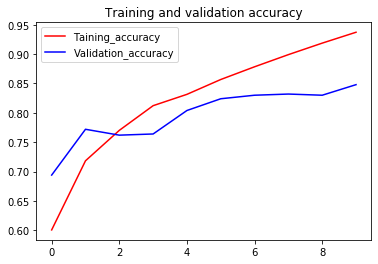

<Figure size 432x288 with 0 Axes>

In [668]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Taining_accuracy')
plt.plot(epochs,val_acc,'b',label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [11]:
%load_ext tensorboard
%tensorboard --logdir logs_catsVsdogs 


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13900), started 2 days, 11:18:17 ago. (Use '!kill 13900' to kill it.)

In [610]:
# save the model 
model.save("saved_model")

INFO:tensorflow:Assets written to: saved_model\assets


In [9]:
#load the model
my_model=tf.keras.models.load_model('saved_model')


In [612]:
loss,acc=my_model.evaluate(X_test_norm,y_test)
acc

500/500 [==============================] - 1s 2ms/sample - loss: 0.3143 - accuracy: 0.8540


0.854

## For submission in kaggle 

In [598]:
#creating test data 
def create_testing_data(test_dir, name):
    test_data=[]
    for img in os.listdir(test_dir):
        label=img.split('.')[0]
        path=os.path.join(test_dir,img)
        test_im_array=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        test_img_array=cv2.resize(test_im_array,(img_size,img_size))
        test_data.append([np.array(test_img_array), np.array(label)])
    np.save(name+str('.npy'),test_data)
    return test_data

train_dir =r"C:\Users\p084466\Desktop\Prive_Expleo\Python\CNN\tensorflow\CatsVsDog_Data\train\train"
test_data=create_testing_data(test_dir,'test_data')

In [644]:
# prediction of test_data
X_test_test=[]
y_test_test=[]
for feature,label in test_data:
    X_test_test.append(feature)
    y_test_test.append(label)
X_test_test=np.array(X_test_test).reshape(-1,img_size,img_size,1)
y_test_test=np.array(y_test_test).reshape(-1,1)

#normalization & prediction: 
X_test_test_norm=X_test_test/255
predictions=my_model.predict(X_test_test_norm)

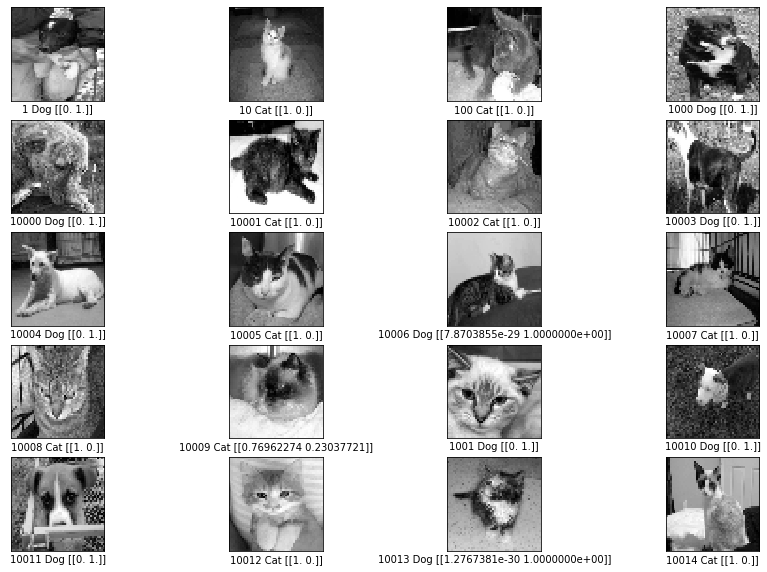

In [634]:
# plot the first 20 test data and add there prediction ([0. 1]=dog, [1 0]=cat)
plt.subplots(5,4,figsize=(15,10))
for Id, data  in enumerate(test_data[:20]):
    plt.subplot(5,4,Id+1)
    img_num= data[1]
    img_data= data[0]
    data=img_data.reshape(1,img_size,img_size,1)
    if np.argmax(my_model.predict(data))==1 :pred_label='Dog'
    else : pred_label='Cat'
    plt.imshow(img_data, cmap='gray')
    plt.xlabel('{} {} {}'.format(img_num,pred_label,my_model.predict(data)))
   #plt.xlabel(str(img_num)+' '+ str(pred_label))
    plt.xticks([])
    plt.yticks([])


In [649]:
#predictions=my_model.predict(X_test_test_norm)
with open('submission_file.csv','w') as f:
    f.write('id,label\n')
    
with open('submission_file.csv','a') as f:
    for Id, data  in enumerate(test_data):
        img_num= data[1]
        img_data= data[0]
        #pred=my_model.predict(img_data.reshape(1,img_size,img_size,1))
        pred=predictions[Id][1]
        f.write('{},{}\n'.format(img_num,pred))       

In [637]:
import pandas as pd
pd.read_csv('submission_file.csv')

,id,label
0,1,1.0
1,10,0.0
2,100,0.0
3,1000,1.0
4,10000,1.0
...,...,...
12495,9995,0.0
12496,9996,1.0
12497,9997,1.0
12498,9998,0.0
